# `Практикум по программированию на языке Python`
<br>

## `Занятие 3: Numpy и матрично-векторные вычисления`
<br><br>

### `Находнов Максим (nakhodnov17@gmail.com)`

#### `Москва, 2022`

О чём можно узнать из этого ноутбука:

* операции при работе с массивами
* многомерные массивы
* изменение размеров массивов
* broadcasting
* продвинутая индексация
* view и копирование
* свёртка
* разные прикладные задачи

In [1]:
import warnings
warnings.filterwarnings('ignore')

### `Представление матрицы в Python`

Простейший вариант - список списков:

In [2]:
A = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
]

B = [
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 3],
]

def print_matrix(A):
    for row in A:
        print(row)
    print()

print_matrix(A)
print_matrix(B)

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]

[1, 0, 0]
[0, 2, 0]
[0, 0, 3]



### `Представление матрицы в Python`

<font color='brown'>**Задача 1.** Задайте матрицу `C` размером $9$ на $10$, в которой $ij$-ый элемент будет равен $10 i + j$. Не используйте библиотеку `numpy`!</font>

In [3]:
### your code here
C = []
for idx in range(9):
    C.append([])
    for jdx in range(10):
        C[-1].append(10 * idx + jdx)

Проверьте себя:

In [4]:
assert len(C) == 9
assert len(C[0]) == 10
assert C[8][3] == 83

print_matrix(C)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69]
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79]
[80, 81, 82, 83, 84, 85, 86, 87, 88, 89]



### `Представление матрицы в Python`

Одна из проблем списков — отсутствие поэлементных и матричных операций.

Другой недостаток — работа со списками не позволяет использовать векторные инструкции в процессоре, которые на порядки ускоряют матричные вычисления

Попробуем самостоятельно реализовать несколько методов для матричных вычислений, работающих с представлением матриц в виде списков.

Для оценки производительности будем использовать *декооратор* `timed`:

In [5]:
def timed(method):
    import time
    def __timed(*args, **kw):
        time_start = time.time()
        result = method(*args, **kw)
        time_end = time.time()
        
        print('{}  {:.3f} ms\n'.format(method.__name__,
                                      (time_end - time_start) * 1000))
        return result

    return __timed

### `Опишем базовые операции: сложение`

In [6]:
@timed
def matrix_add(A, B):
    # skip correctness of dimensions check

    n, m = len(A), len(A[0])
    C = [[0.0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        for j in range(m):
            C[i][j] = A[i][j] + B[i][j]
    return C

print_matrix(matrix_add(A, B))

matrix_add  0.010 ms

[2, 2, 3]
[4, 7, 6]
[7, 8, 12]



### `Опишем базовые операции: транспонирование`

In [7]:
@timed
def matrix_transpose(A):
    n, m = len(A), len(A[0])
    C = [[0.0 for _ in range(n)] for _ in range(m)]

    for i in range(n):
        for j in range(m):
            C[j][i] = A[i][j]
    return C

print_matrix(matrix_transpose(A))

matrix_transpose  0.009 ms

[1, 4, 7]
[2, 5, 8]
[3, 6, 9]



### `Опишем базовые операции: умножение`

In [8]:
def dot(a, b):
    return sum(x * y for (x, y) in zip(a, b))

@timed
def matrix_mul(A, B):
    # check correctness of dimensions
    n, m = len(A), len(B[0])
    C = [[0.0 for _ in range(n)] for _ in range(m)]

    B_T = matrix_transpose(B)
    for i in range(n):
        for j in range(m):
            C[i][j] = dot(A[i], B_T[j]) 
    return C

print_matrix(matrix_mul(A, B))

matrix_transpose  0.006 ms

matrix_mul  0.291 ms

[1, 4, 9]
[4, 10, 18]
[7, 16, 27]



### `Библиотека NumPy`

- Позволяет работать с многомерными массивами<br><br>

- Реализует множество базовых матричных операций<br><br>

- Работает на порядки быстрее самописных реализаций в Python<br><br>

- Поддерживается большинством сторонних модулей, работающих с матрицами<br><br>

In [9]:
# from numpy import * — НЕ ДЕЛАЙТЕ ТАК
import numpy as np

Текущая версия:

In [10]:
np.__version__

'1.21.6'

### `Почему NumPy быстрая`

- Значительная часть кода написана на C<br><br>

- Базовым классом является `ndarray`, имеющий следующие отличия от списков:

    1. NumPy array имеет фиксированную длину, задаваемую в момент его создания (списки в Python могут менять размер динамически)

    2. Все элементы в NumPy array имеют один тип<br><br>

- NumPy array хранится в памяти в виде одного последовательного блока, что позволяет эффективно использовать процессорный кэш и векторные инструкции<br><br>

- NumPy можно подключить к высокооптимизированным библиотекам для матричной алгебры (BLAS, LAPACK, Intel MKL)<br><br>

- Часть матричных операций может быть распараллелена при наличии в системе нескольких потоков


### `Способы создания NumPy array`

1. Пустой
2. Заполненный нулями
3. Заполненный единицами
4. Заполненный нужным значением

In [11]:
print(np.empty(shape=[2, 3]))  # values are arbitrary

[[0.e+000 7.e-323 0.e+000]
 [0.e+000 0.e+000 0.e+000]]


In [12]:
print(np.zeros([2, 3]))

[[0. 0. 0.]
 [0. 0. 0.]]


In [13]:
print(np.ones([2, 3]))

[[1. 1. 1.]
 [1. 1. 1.]]


In [14]:
print(np.full([2, 3], 3.0))

[[3. 3. 3.]
 [3. 3. 3.]]


### `Способы создания NumPy array`

Указанные четыре функции имеют аналоги с суффиксом `*_like`, которые создают массив того же размера, что передан в качестве агрумента:

In [15]:
a = np.zeros([1, 2, 3])
b = np.ones_like(a)

print(a)
print(b)
a.shape, b.shape

[[[0. 0. 0.]
  [0. 0. 0.]]]
[[[1. 1. 1.]
  [1. 1. 1.]]]


((1, 2, 3), (1, 2, 3))

### `Способы создания NumPy array`

Для создания одномерных массивов можно передавать их длину в виде целого числа:  

In [16]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

Для одномерного массива тоже можно писать кортеж:

In [17]:
np.zeros((5, ))

array([0., 0., 0., 0., 0.])

Для больших размерностей, так задавать массив нельзя.

Так неправильно:

In [18]:
np.zeros(5, 7)

TypeError: Cannot interpret '7' as a data type

### `Способы создания NumPy array`

5. На основе списков

In [ ]:
print(np.array([[1, 2, 3], [4, 5, 6]]))

Число элементов должно удовлетворять размерности, numpy попытается преобразовать типы:

In [19]:
print(np.array([[1, 2, 3], [4, 6]]))

[list([1, 2, 3]) list([4, 6])]


Тип можно указать явно, и неправильное число элементов приведёт к ошибке:

In [20]:
np.array([[1, 2, 3], [4, 6]], dtype=np.float32)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

### `Способы создания NumPy array`

6. Последовательность целых чисел заданной длины

In [21]:
# Синтаксис аналогичен функции `range`, но в этом случае данные хранятся в памяти
np.arange(2, 10) 

array([2, 3, 4, 5, 6, 7, 8, 9])

7. Разбиение отрезка на равные подотрезки (в исходном и log-масштабе)

In [22]:
np.linspace(0.0, 1.0, 5), np.logspace(0.0, 1.0, 5)

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([ 1.        ,  1.77827941,  3.16227766,  5.62341325, 10.        ]))

### `Способы создания NumPy array`

<font color='brown'>**Задача 2.** Задайте массив `result` размером $50$ на $30$, состоящий из троек:</font>

In [23]:
### your code here
a = np.full([50, 30], 3)

assert a.shape == (50, 30)
a

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]])

<font color='brown'>**Задача 3.** Какая размерность будет у массива, полученного с помощью команды `np.array([[1], [2]])`?</font>

In [24]:
### your answer here
assert np.array([[1], [2]]).shape == (2, 1)

### `Важные параметры создания ndarray`

- `shape` — список или кортеж с размерностями создаваемого массива<br><br>

- `dtype` — указание типа элементов массива, если массив создаётся на базе объектов из Python, то должно существовать преобразование из типа этих объектов в указываемый тип<br><br>

- `order` — порядок хранения данных в памяти, по строкам (C-order) или же по столбцам (Fortran-order). По-умолчанию используется C-order

### `Отличие классов np.ndarray и np.matrix`

- `ndarray` — более общий класс, поддерживающий все возможные операции<br><br>

- `matrix` — более узкий класс, наследующий `ndarray`. Он поддерживает несколько операций и атрибутов, специфичных для матриц, в удобной нотации<br><br>

- При этом все те же операции можно применять и к `ndarray`, если он двумерный и состоит из чисел (начиная с Python 3.5 умножение можно записать как `A @ B`)<br><br>

- Рекомендуется пользоваться `ndarray`, чтобы не вносить путаницу в код и не проверять каждый раз, какого именно типа массив будет обрабатываться

### `Изменение размерности`

`reshape` позволяет изменить размерности массива __без изменения общего числа элементов__:

In [25]:
a = np.zeros([2, 3, 2])
print(a, a.shape)

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]] (2, 3, 2)


In [26]:
b = a.reshape((1, 2 * 3 * 2))
print(b, b.shape, '\n')

b[0][0] = 10  # 'b' is a new view on the same data

print(a, a.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] (1, 12) 

[[[10.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]] (2, 3, 2)


Можно проверить, не пересекаются ли в памяти два массива: 

In [27]:
np.may_share_memory(a, b)

True

### `Изменение размерности`

Отметим, что практически все методы `np.ndarray` доступны в виде функций модуля NumPy:

In [28]:
c = np.reshape(b, (2 * 3, 2))
print(c, c.shape)

[[10.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]] (6, 2)


Размерность можно изменить и напрямую:

In [29]:
c.shape = (1, 2 * 3 * 2)
print(c, c.shape)

[[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] (1, 12)


Можно "не заполнять" одну размерность итогового массива, она заполнится автоматически:

In [30]:
d = c.reshape(2, -1, 3)
print(d, d.shape)

[[[10.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]]] (2, 2, 3)


### `Про размерности массивов`

In [31]:
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3]])
c = np.array([[1], [2], [3]])
print(a.shape)
print(b.shape)
print(c.shape)

(3,)
(1, 3)
(3, 1)


- Данные лежат в памяти одним и тем же образом

- Вопрос только во `view` $==$ способ индексации $==$ число и порядок индексов

In [32]:
print(a.ndim, b.ndim, c.ndim)

1 2 2


Полезная для понимания происходящего статья: https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r

### `View и копирование`

View ссылается на те же данные, но позволяет задать другие размерности массива.

In [33]:
x = np.arange(10)
v = x.view()
v.shape = (2, 5)
x, v

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]))

In [34]:
v[0, 0] = 100
x, v

(array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9]),
 array([[100,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]]))

Если нужно получить копию массива, чтобы не портить переданные данные, пользуйтесь методом `copy`:

In [35]:
x = np.arange(10)
y = x.copy()
y[:] = 0
x, y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

### `Индексирование`

- Всё аналогично спискам, можно делать срезы и использовать отрицательные индексы
- Индексы и срезы в многомерных массивах не обязательно разделять квадратными скобками
- Подробное описание: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [36]:
a = np.array([[1, 2, 3], [3, 4, 5]])

print(a, '\n')
print(a[0], '\n')
print(a[0, 0: 100500], '\n')
print(a[0][1], '\n')
print(a[-1][-2], '\n')
print(a[-1, -2], '\n')
print(a[0, 0: -1])

[[1 2 3]
 [3 4 5]] 

[1 2 3] 

[1 2 3] 

2 

4 

4 

[1 2]


### `Индексирование`

Важное отличие от питоновских списков: при slicing возвращается **view**, а не копия! Это позволяет присваивать значения подматрицам.

In [37]:
a = np.array([[1, 2, 3], [3, 4, 5]])
print(a, '\n')

a[:, 1] = 10
print(a, '\n')

[[1 2 3]
 [3 4 5]] 

[[ 1 10  3]
 [ 3 10  5]] 



### `Логическое индексирование`

Индексирование можно производить по логическому массиву такого же размера:

In [38]:
a = np.arange(10)
i = np.array([j % 2 == 0 for j in range(10)])

print(a, '\n')
print(i, '\n')
print(a[i], '\n')

[0 1 2 3 4 5 6 7 8 9] 

[ True False  True False  True False  True False  True False] 

[0 2 4 6 8] 



При этом такие слайсы также позволяют менять исходный массив:

In [39]:
a[i] = 11
a

array([11,  1, 11,  3, 11,  5, 11,  7, 11,  9])

### `Логическое индексирование`

С помощью функции `where`, можно находить индексы элементов, заданные маской:

In [40]:
np.where(a > 4)

(array([0, 2, 4, 5, 6, 7, 8, 9]),)

В случае одномерного массива `np.where` возвращается `tuple`. Подробнее смотри документацию.

<font color='brown'> **Задача 4.** Даны два вектора одинаковой длины: `a` и `b`. Оставить в этих векторах только те элементы, которые соответствуют позициям ненулевых элементов в обоих векторах. </font>

In [41]:
a = np.array([0, 1, 0, 2, 3])
b = np.array([1, 5, 2, 0, 6])

In [42]:
### your code here
mask_a = np.where(a != 0)
a, b = a[mask_a], b[mask_a]
mask_b = np.where(b != 0)
a, b = a[mask_b], b[mask_b]

Проверьте себя:

In [43]:
assert a.tolist() == [1, 3]
assert b.tolist() == [5, 6]

### `Сложное индексирование`

По каждой размерности подаются массивы одинаковых размеров, элементы которых соответствуют индексам каждой размерности. Тогда, на выходе будет массив размера этих массивов, элементы которого будут соответствовать элементам исходного массива, взятых в точках, соответствующих поданным массивам.

In [44]:
X = np.array([[1, 2, 3], [4, 5, 6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
X[[0, 1], [1, 2]], X[[0, 0], [1, 0]]

(array([2, 6]), array([2, 1]))

In [46]:
Y = np.arange(24).reshape((3, 2, 4))
Y

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [47]:
Y[[1, 0], :, [2, 1]]

array([[10, 14],
       [ 1,  5]])

### `Сокращенная индексация`

Если у вас есть многомерный массив, а вам, например, надо взять определенные индексы только с последней размерности, то можно написать так:

In [48]:
x = np.arange(80).reshape((2, 2, 4, 5))

print(x[..., 0])
x[..., 0].shape

[[[ 0  5 10 15]
  [20 25 30 35]]

 [[40 45 50 55]
  [60 65 70 75]]]


(2, 2, 4)

Более хитрый пример:

In [49]:
x = np.arange(720).reshape((3, 4, 5, 3, 2, 2))

print(x[2, :, 3, ..., 0])
x[2, :, 3, ..., 0].shape

[[[516 518]
  [520 522]
  [524 526]]

 [[576 578]
  [580 582]
  [584 586]]

 [[636 638]
  [640 642]
  [644 646]]

 [[696 698]
  [700 702]
  [704 706]]]


(4, 3, 2)

### `Арифметические операции`

- Арифметические операции в общем случае по-элементные и требуют одинакового размера операндов<br>

- Но часто NumPy может применять их к операндам разного размера с помощью broadcasting, то есть правил обработки операндов разного размера<br><br>

Примеры операций с массивами одного размера:

In [50]:
A, B = np.array(A), np.array(B)  # were declared previously

print(A, '\n\n', B, '\n\n', 2 * A, '\n\n', A + B)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

 [[1 0 0]
 [0 2 0]
 [0 0 3]] 

 [[ 2  4  6]
 [ 8 10 12]
 [14 16 18]] 

 [[ 2  2  3]
 [ 4  7  6]
 [ 7  8 12]]


### `Поэлементные арифметические операции`

In [51]:
np.sin(A)

array([[ 0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ],
       [ 0.6569866 ,  0.98935825,  0.41211849]])

In [52]:
np.abs(A)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [53]:
A ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974],
       [2.64575131, 2.82842712, 3.        ]])

Поэлементые операции сравнения:

In [54]:
A > 3

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]])

### `Матричные арифметические операции`

In [55]:
print(A - B)

[[0 2 3]
 [4 3 6]
 [7 8 6]]


In [56]:
print(A * B)

[[ 1  0  0]
 [ 0 10  0]
 [ 0  0 27]]


In [57]:
print(B / A)

[[1.         0.         0.        ]
 [0.         0.4        0.        ]
 [0.         0.         0.33333333]]


In [58]:
print(A @ B)

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]


### `Фиктивная размерность`

Два способа добавить фиктивную размерность в произвольный массив:

In [59]:
d[:, np.newaxis].shape

(2, 1, 2, 3)

In [60]:
d[None, :].shape

(1, 2, 2, 3)

Для одномерного массива можно использовать `reshape`:

In [61]:
x = np.arange(7)

x, x.reshape(-1, 1)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6]]))

Зачем нужно добавлять фиктивную размерность? Например, чтобы проводить различные операции с массивами неравного размера.

### `Broadcasting`

Подробное описание: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

Пусть нам дана матрица $X$ размером $5 \times 5$ и вектор $y$ длины $5$. Пусть мы хотим прибавить вектор к каждой строке матрицы. 

In [62]:
x = np.arange(25).reshape(5, 5)
y = np.arange(5)

x, y

(array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]),
 array([0, 1, 2, 3, 4]))

Наивный способ решения проблемы будет работать правильно!

In [63]:
x + y

array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13],
       [10, 12, 14, 16, 18],
       [15, 17, 19, 21, 23],
       [20, 22, 24, 26, 28]])

**Почему?** Правила broadcasting (приведение размеров).

1. Если два массива имеют размерности $(a_1, a_2, ..., a_n)$ и $(b_1, b_2, ..., b_n)$ соответственно, то между ними можно проводить поэлементные операции, если для каждого $i$ выполнено одно из трёх условий:
    * $a_i = b_i$
    * $a_i = 1$
    * $b_i = 1$
    
2. Если поэлементная операция выполняется между массивами разного размера, то к массиву меньшего размера добавляются ведущие фиктивные размерности.

### `Арифметика и broadcasting`

Если по одному из измерений массивы не равны, и у одного из них эта размерность имеет длину 1, то он будет продублирован по этой размерности:

In [64]:
a = np.array([[1, 2], [3, 4]])
b = np.array([1])
c = np.array([1, 1])

print(b + c, '\n')
print(a + b, '\n')
print(a + c)

[2 2] 

[[2 3]
 [4 5]] 

[[2 3]
 [4 5]]


### `Арифметика и broadcasting`

Если не совпадает количество размерностей, то массив, у которого их меньше, будет "добиваться" слева размерностями длины 1:

In [65]:
a = np.ones((2, 3, 4))
b = np.ones(4)

print(a + b) # here a.shape=(2, 3, 4) and b.shape is considered to be (1, 1, 4)

[[[2. 2. 2. 2.]
  [2. 2. 2. 2.]
  [2. 2. 2. 2.]]

 [[2. 2. 2. 2.]
  [2. 2. 2. 2.]
  [2. 2. 2. 2.]]]


### `Арифметика и broadcasting`

Добавим к массиву вектор-строку:

In [66]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2, 3])
a + b

array([[2, 4, 6],
       [5, 7, 9]])

Теперь попробуем добавить столбец:

In [67]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2])
a + b

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

### `Арифметика и broadcasting`

- Ошибка возникла из-за того, что прибавлялась строка с неправильным размером<br>

- Нужно преобразовать строку в столбец (добавить фиктивную размерность), и тогда NumPy поймёт, как с ней работать<br><br>

Для этого воспользуемся `reshape` (способ хороший, но далеко не единственный):

In [68]:
a + np.reshape(b, (2, 1))

array([[2, 3, 4],
       [6, 7, 8]])

### `Арифметика и broadcasting`

**Всегда проверяйте операции с броадкастингом! Легко можно напороться на неприятности**

<font color='brown'>**Задача 5.** Какие из этих команд будут выполняться с ошибкой?</font>

1. `np.ones((2, 3)) + np.ones(3)`

2. `np.ones(2) + np.ones((2, 3))`

3. `np.zeros((4, 3)) + np.ones((4, 1))`

4. `np.zeros((3, 4)) + np.ones((4, 3))`

5. `np.zeros((1, 3, 5)) + np.zeros((1, 3))`

6. `np.zeros((5, 3, 1)) + np.zeros((1, 5))`

In [69]:
### your answer here

# 1. [2, 3], [3] -> [2, 3], [1, 3] -> OK
np.ones((2, 3)) + np.ones(3)

# 2. [2], [2, 3] -> [1, 2], [2, 3] -> Not OK
try:
    np.ones(2) + np.ones((2, 3))
    assert False
except:
    assert True

# 3. [4, 3], [4, 1] -> OK
np.zeros((4, 3)) + np.ones((4, 1))

# 4. [3, 4], [4, 3] -> Not OK
try:
    np.zeros((3, 4)) + np.ones((4, 3))
    assert False
except:
    assert True

# 5. [1, 3, 5], [1, 3] -> [1, 3, 5], [1, 1, 3] -> Not OK
try:
    np.zeros((1, 3, 5)) + np.zeros((1, 3))
    assert False
except:
    assert True

# 6. [5, 3, 1], [1, 5] -> [5, 3, 1], [1, 1, 5] -> OK
np.zeros((5, 3, 1)) + np.zeros((1, 5))

pass

<font color='brown'>**Задача 6.** Пусть нам дана матрица $X$ размером $10 \times 10$ и вектор-столбец $y$ длины $10$. Получите матрицу `result`, полученную прибавлением к каждому столбцу $X$ вектора $y$ (без использования циклов). </font>

In [70]:
x = np.arange(100).reshape(10, 10)
y = np.arange(10)

In [71]:
## your code here
result = x + y[:, None]

Проверьте себя:

In [72]:
assert result[0][0] == 0
for i in range(1, 10):
    assert result[i][i-1] == 10 * i + (i - 1) * 2 + 1

### `Матричное умножение`

Расмотрим для случая двумерных матриц, кому интересны многомерные, изучайте 
https://numpy.org/devdocs/reference/generated/numpy.dot.html

In [73]:
print(A @ B, '\n')
print(A.dot(B), '\n')
print(np.dot(A, B))

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]] 

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]] 

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]


### `Транспонирование`

- Расмотрим для случая двумерных матриц, кому интересны многомерные, изучайте
https://stackoverflow.com/questions/32034237/how-does-numpys-transpose-method-permute-the-axes-of-an-array
- При транспонировании (как и `reshape`) возвращается ссылка на те же данные

In [74]:
print(A, '\n\n', A.T, '\n\n', A.transpose())

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

 [[1 4 7]
 [2 5 8]
 [3 6 9]] 

 [[1 4 7]
 [2 5 8]
 [3 6 9]]


### `Сравнение скорости`

Воспользуемся декоратором `timed` для сравнения скорости матричных операций, реализованных в `numpy` и написанных выше с помощью списков:

In [75]:
@timed
def matrix_add_np(A, B): return A + B

@timed
def matrix_mul_np(A, B): return A @ B

In [76]:
tmp = [range(1000) for _ in range(1000)]
X, Y = np.array(tmp), np.array(tmp)

_ = matrix_add(X, Y)
_ = matrix_add_np(X, Y)

tmp = [range(200) for _ in range(200)]
X, Y = np.array(tmp), np.array(tmp)

_ = matrix_mul(X, Y)
_ = matrix_mul_np(X, Y)

matrix_add  495.491 ms

matrix_add_np  3.050 ms

matrix_transpose  9.990 ms

matrix_mul  1433.581 ms

matrix_mul_np  4.827 ms



### `Агрегирующие функции`

Подобных функций много, ищите нужное в документации NumPy

In [77]:
a = np.array([1, 2, 3, 4, 3, 2, 1, 3, 3])

print('Min element:          {}'.format(np.min(a)))
print('Min element position: {}'.format(np.argmin(a)))
print('Max element:          {}'.format(np.max(a)))
print('Mean:                 {}'.format(np.mean(a)))
print('Sum:                  {}'.format(np.sum(a)))
print('Median:               {}'.format(np.median(a)))
print('Cumulative sum:       {}'.format(np.cumsum(a)))
print('Cumulative product:   {}'.format(np.cumprod(a)))

Min element:          1
Min element position: 0
Max element:          4
Mean:                 2.4444444444444446
Sum:                  22
Median:               3.0
Cumulative sum:       [ 1  3  6 10 13 15 16 19 22]
Cumulative product:   [   1    2    6   24   72  144  144  432 1296]


Что будет происходить в случае многомерного массива?

### `Агрегирующие функции`

В многомерном случае операция применяется к массиву, вытянутому в вектор (flatten):

In [78]:
a = np.array([[1, 2, 3], [4, 3, 2], [1, 3, 3]])
print(a, '\n')
print(np.max(a))
print(np.cumsum(a))

[[1 2 3]
 [4 3 2]
 [1 3 3]] 

4
[ 1  3  6 10 13 15 16 19 22]


Для работы с определёнными размерностям нужно указать явно параметр `axis`:

In [79]:
print(np.max(a, axis=0), '\n')
print(np.cumsum(a, axis=1))

[4 3 3] 

[[1 3 6]
 [4 7 9]
 [1 4 7]]


Как легко запомнить, как работает axis:
* после применения функции получится массив, в котором будет отсутствовать размерность указанная в `axis`, но остальные размерности будут иметь такие же значения

### `Агрегирующие функции`

<font color='brown'>**Задача 7.** Дан вектор $x$ и квадратная матрица $D$. Вычислить вектор значений $y_j = argmin_i (x_i + D_{ij})$. </font>

In [80]:
x = np.array([5, 2, 3, 1])
D = np.array([
    [1, 2, 3],
    [2, 2, 4],
    [5, 6, 1],
    [2, 4, 5]
])

In [81]:
### your code here
y = np.argmin(D + x[:, None], axis=0)

Проверьте себя:

In [82]:
assert y.tolist() == [3, 1, 2]

### `Конкатенация массивов`

Конкатенировать несколько массивом можно с помощью функций `concatenate` (общий случай), `hstack` и `vstack`:

In [83]:
np.hstack([A, B])

array([[1, 2, 3, 1, 0, 0],
       [4, 5, 6, 0, 2, 0],
       [7, 8, 9, 0, 0, 3]])

In [84]:
np.vstack([A, B])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

### `Ещё несколько полезных функций`

Чтобы построить двумерный массив, состоящий из повторений одномерных, можно использовать `np.tile`:

In [85]:
a = np.array([2, 3, 4])
np.tile(a[np.newaxis, :], (2, 1))

array([[2, 3, 4],
       [2, 3, 4]])

Для того, чтобы повторить каждый элемент в массиве, можно использовать `np.repeat`

In [86]:
np.repeat([1, 2, 3], repeats=2, axis=0)

array([1, 1, 2, 2, 3, 3])

In [87]:
print(np.all(A == A))
print(np.all(A == B))
print(np.all(A == [1, 2, 3], axis=1))

True
False
[ True False False]


In [88]:
func = np.vectorize(lambda x: x ** 2)
func(A)

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

### `Типы и преобразование типов`

Атрибут `dtype` хранит информацию о типе массива:

In [89]:
x = np.arange(15)
y = np.array([1.5, 2.5])

x.dtype, y.dtype

(dtype('int64'), dtype('float64'))

Преобразование типов осуществляется с помощью метода `astype`:

In [90]:
x = x.astype(np.float64)
x.dtype

dtype('float64')

Можно сразу указывать желаемый тип при создании массивов при помощи параметра `dtype`:

In [91]:
np.ones((2, 3), dtype=str)

array([['1', '1', '1'],
       ['1', '1', '1']], dtype='<U1')

### `Примеры задач на матрицы в NumPy`

Условие - нельзя использовать
- циклы
- генераторы списков/списковые включения
- map-функции (в т.ч. `np.vectorize`)

<font color='brown'> **Задача 8**. Пронумеровать в порядке следования максимальные элементы в векторе. Для вектора `[1, 2, 3, 3, 2, 1, 3, 1]` должно получиться `[0, 0, 1, 2, 0, 0, 3, 0]`: </font>

In [92]:
def task_1(a):
    b = a == np.max(a)
    return np.cumsum(b) * b

print(task_1([1, 2, 3, 3, 2, 1, 3, 1]))

[0 0 1 2 0 0 3 0]


### `Примеры задач на матрицы в NumPy`

<font color='brown'> **Задача 9**. Реализуйте функцию подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы. Для матрицы `[[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]` ответом является $3$. Если ненулевых элементов нет, функция должна возвращать `None`: </font>

In [93]:
def task_2(A):
    B = A.diagonal()
    return np.prod(B[B > 0]) if np.any(B > 0) > 0 else None

print(task_2(np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])))

3


<font color='brown'> **Задача 10**. Найти максимальный элемент в вектор-строке среди элементов, перед которым стоит нулевой. Для `[0, 4, 2, 0, 3, 0, 0, 5, 7, 0]` ответ равен $5$: </font>

In [94]:
def task_3(a):
    return np.max(a[np.where(a[0: -1] == 0)[0] + 1])  # [0] to skip technical wrapper, + 1 for shift

print(task_3(np.array([0, 4, 2, 0, 3, 0, 0, 5, 7, 0])))

5


### `Примеры задач на матрицы в NumPy`

<font color='brown'> **Задача 11.** Дана матрица размерности $N \times K$, $N$ - число объектов, $K$ - число признаков.
Подсчитать выборочное среднее и ковариационную матрицу без использования
функций mean и cov.

$$ E[X]={\frac {1}{n}}\sum \limits _{i=1}^{n}x_{i} $$

$$ {\mathrm  {cov}}(X_{{(n)}},Y_{{(n)}})={\frac  1n}\sum _{{t=1}}^{n}\left(X_{t}-\overline {X}\right)\left(Y_{t}-\overline {Y}\right)$$

 </font>

In [95]:
X = np.arange(32).reshape(8, 4)

In [96]:
### your code here
mean = X.sum(axis=0) / X.shape[0]
cov = (X - mean).T @ (X - mean) / X.shape[0]

In [97]:
assert mean.tolist() == [14, 15, 16, 17]
assert np.all(cov == 84)

### `Примеры задач на матрицы в NumPy`

<font color='brown'> **Задача 12.** Замените все максимальные элементы матрицы $A$ на $0$. </font>

In [98]:
A = np.array([
    [1, 6, 3],
    [6, 2, 1],
    [4, 5, 6],
    [1, 2, 1],
])

In [99]:
### your code here
a_max = A.max()
A[A == a_max] = 0

In [100]:
new_A = np.array([
    [1, 0, 3],
    [0, 2, 1],
    [4, 5, 0],
    [1, 2, 1],
])
assert np.all(A == new_A)

### `Примеры задач на матрицы в NumPy`

<font color='brown'> **Задача 13.** Вычислить площадь круга методом Монте-Карло. </font>

In [101]:
N = 1000
X = np.random.uniform(0, 1, size=(N, 2))

In [102]:
### your code here
M, r = np.array([0.5, 0.5]), 0.5

ratio = np.mean(np.linalg.norm(X - M, axis=1) < 0.5)
print(ratio)

0.78


Проверьте себя:

In [103]:
np.pi / 4

0.7853981633974483

Постройте график, как значения убывают с итерациями. 

Для интереса будем оценивать не просто площать круга, а объём $d$-мерной сферы радиуса $r$ с центором в точке $M(r, ..., r)$:
$$
V_{d} = \frac{\pi^{\frac{d}{2}} r^{d}}{\Gamma(\frac{d}{2} + 1)}
$$

In [104]:
import time
import math
import matplotlib.pyplot as plt

### your code here
N_max, r, d = 100000, 0.5, 2

M = np.full(d, r) 
V_d = np.pi ** (d / 2.0) * r ** d / math.gamma(d / 2.0 + 1.0)

Ns = np.array(range(20, N_max, 50))

# Медленный, но корректный способ решить задачу
ratios_01 = []
start_time_01 = time.time()
for N in Ns:
    X_sampled = np.random.uniform(0, 1, size=(N, d))
    ratio = np.mean(np.linalg.norm(X_sampled - M, axis=1) < 0.5)
    ratios_01.append(ratio)
time_01 = time.time() - start_time_01

# Более быстрый, но неправильный способ решить задачу (оценки для соседних N будут скоррелированы)
ratios_02 = []
start_time_02 = time.time()
X = np.random.uniform(0, 1, size=(N_max, d))
for N in Ns:
    X_sampled = X[:N]
    ratio = np.mean(np.linalg.norm(X_sampled - M, axis=1) < 0.5)
    ratios_02.append(ratio)
time_02 = time.time() - start_time_02

# Может быть быстрее, если сэмплирование индексов быстрее, чем пересемплирование данных
#   Например, если d >> 1.
ratios_03 = []
start_time_03 = time.time()
X = np.random.uniform(0, 1, size=(N_max, d))
for N in Ns:
    X_sampled = X[np.random.choice(N_max, size=N)]
    ratio = np.mean(np.linalg.norm(X_sampled - M, axis=1) < 0.5)
    ratios_03.append(ratio)
time_03 = time.time() - start_time_03

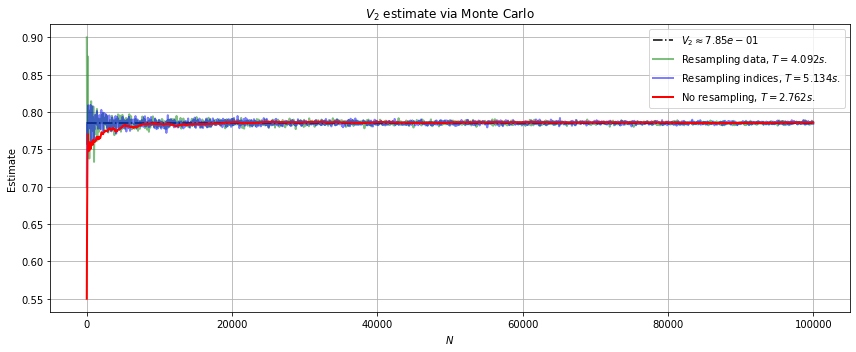

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.hlines(
    V_d, Ns.min(), Ns.max(), label=r'$V_{{{0:d}}} \approx {1:.2e}$'.format(d, V_d), 
    color='black', linestyle='-.'
)
ax.plot(
    Ns, ratios_01, label='Resampling data, $T={0:.3f}s.$'.format(time_01),
    color='green', alpha=0.5, linewidth=2
)
ax.plot(
    Ns, ratios_03, label='Resampling indices, $T={0:.3f}s.$'.format(time_03),
    color='blue', alpha=0.5, linewidth=2
)
ax.plot(
    Ns, ratios_02, label='No resampling, $T={0:.3f}s.$'.format(time_02),
    color='red', linewidth=2
)

ax.set_xlabel('$N$')
ax.set_ylabel('Estimate')
ax.set_title(r'$V_{{{0:d}}}$ estimate via Monte Carlo'.format(d))
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Примеры задач на матрицы в NumPy`

<font color='brown'> **Задача* 14.** Даны матрицы $A$ размера $(n \times d)$ и $B$ размера $(m \times d)$. Найти в $A$ все строки, содержащиеся в $B$, не используя циклы. Оцените сложность полученного алгоритма.  </font>

In [106]:
A = np.array([
    [1, 2, 3],
    [1, 2, 1],
    [4, 5, 6],
    [1, 2, 1],
    [4, 2, 1]
])

B = np.array([
    [4, 5, 6],
    [4, 5, 6],
    [1, 2, 3],
    [0, 1, 2]
])

In [107]:
### your code here

Воспользуемся бродкастингом для решения задачи. Сначала сформируем трёхмерный тензор $C = \{c_{ijk}\}$ такой, что $c_{ijk} = \mathbb{1}[a_{ik} == b_{jk}]$. Для этого введём в обеих матрицах фиктивные размерности: в матрице $A$ после первой размерности, а в матрице $B$ перед первой размерностью. В таком случае:
* Матрица $A$ виртуально продублируется вдоль новой оси столько раз, сколько строк в исходной матрице $B$
* Матрица $B$ виртуально продублируется вдоль новой оси столько раз, сколько строк в исходной матрице $A$
* В итоге размеры матриц совпадут и над ними можно будет выполнить поэлементную операцию сравнения

![Broadcasting example](EricsBroadcastingDoc_Figure6.jpeg)

Затем, выполним агрегацию над матрицей $C$. Сначала, для каждой пары строк получим индикатор того, что строки совпали. Для этого воспользуемся функцией `np.all`. Полученная таким образом матрица $D$ будет содержать информацию о всех парах одинаковых строк. Так как нам нужно найти индексы строк в $A$, которые совпали хотя бы с одной строкой в $B$, нужно ещё раз проагрегировать матрицу с помощью функции `np.any`. Полученную булеву маску несложно превратить в индексы с помощью функции `np.where`.

In [108]:
indexes = np.where(
    np.any(np.all(A[:, None, :] == B[None, :, :], axis=-1), axis=-1)
)[0]

Проверьте себя:

In [109]:
assert set(indexes) == {0, 2}

### `Примеры задач на матрицы в NumPy`

<font color='brown'> **Задача* 15.** Даны матрицы $A$ размера $(n \times d)$ и $B$ размера $(m \times d)$. Посчитайте матрицу попарных расстояний $D$ размера $(n \times m)$ такую, что $d_{ij} = \{||a_{i} - b_{j}||\}_{i,j}^{n, m}$,  используя broadcasting. Оцените сложность полученного алгоритма. Можно ли существенно её улучшить? Подсказка: раскройте квадрат нормы разности. </font>

In [110]:
m, n, d = 5, 4, 3

A = np.random.randn(n, d)
B = np.random.randn(m, d)
A, B

(array([[-1.31797973,  0.16489583,  0.46075782],
        [-1.76003351,  0.91085954, -1.2206148 ],
        [ 0.07968104, -2.48083871, -0.3695034 ],
        [-1.58412674,  0.00868928,  0.3940016 ]]),
 array([[-1.13474599, -1.39677612,  0.87425101],
        [-1.02027613, -0.06838805, -0.4925388 ],
        [-1.0645013 ,  1.47252936,  1.03152368],
        [-0.31641104,  0.75016368,  0.09218202],
        [-1.98540312,  1.14217962,  0.08810084]]))

In [111]:
### your code here

Решение данной задачи идейно совпадает с предыдущим заданием: нам также нужно воспользоваться бродкастингом для вычисления евклидова расстояния. Основное отличие — функция агрегации, которая используется для вычисления ответа.

In [112]:
distances_01 = np.linalg.norm(A[:, None, :] - B[None, :, :], axis=-1)

Однако, решение с бродкастингом не самое эффективное. За счёт использования матричного умножения можно решить задачу значительно быстрее, хоть и ассимптотически с такой же скоростью $\mathcal{O}(nmd)$.

In [113]:
# ||a - b||^{2} = ||a||^{2} + ||b||^{2} - 2 * <a, b>
distances_02 = np.sqrt(
    np.linalg.norm(A, axis=-1)[:, None] ** 2 + 
    np.linalg.norm(B, axis=-1)[None, :] ** 2 - 
    (2.0 * A) @ B.T
)

assert np.max(np.abs(distances_01 - distances_02)) < 1e-10

Также, сверимся с библиотечной реализацией:

In [114]:
from scipy.spatial.distance import cdist

assert np.max(np.abs(distances_01 - cdist(A, B))) < 1e-10

Сравним эти три метода по скорости:

In [115]:
@timed
def distance_broadcasting(A, B): 
    return np.linalg.norm(A[:, None, :] - B[None, :, :], axis=-1)

@timed
def distance_matmul(A, B): 
    return np.sqrt(
        np.linalg.norm(A, axis=-1)[:, None] ** 2 + 
        np.linalg.norm(B, axis=-1)[None, :] ** 2 - 
        (2.0 * A) @ B.T
    )

@timed
def distance_scipy(A, B): 
    return cdist(A, B)

In [116]:
m, n, d = 1000, 1000, 1000

A = np.random.randn(n, d)
B = np.random.randn(m, d)

In [117]:
distance_broadcasting(A, B)
distance_matmul(A, B)
distance_scipy(A, B)
pass

distance_broadcasting  8204.034 ms

distance_matmul  30.425 ms

distance_scipy  348.405 ms



Видно, что разница в скорости почти три порядка! Более того, кастомная реализация на порядок быстрее библиотечной!

## Бонус. Несколько полезных библиотек

### `Библиотека NetworkX`

- Позволяет работать с графами, в узлах которых могут находиться любые объекты<br><br>

- Имеет встроенные процедуры создания графов базовых типов<br><br>

- Реализует множество алгоритмов на графах, позволяет получать характеристики графов<br><br>

- Поддерживается основные форматы хранения графов в файлах<br><br>

- Имеет встроенные инструменты для визуализации графов (на базе mathplotlib и GraphViz)<br><br>

- В качестве базовой структуры данных использует словарь (`dict`)

### `Основные классы графов`

- `Graph` — простой неориентированнsq граф. Кратные ребра игнорируются, допускаются петли.
- `DiGraph` — ориентированный версия `Graph`
- `MultiGraph` — неориентированный граф, допускающий кратные ребра
- `MultiDiGraph` — ориентированная версия `MultiDiGraph`

In [119]:
import networkx as nx
G = nx.Graph()
G

### `Создание графа`

Доступны три способа создания:
- Явное добавление вершин и ребер в скрипте
- Генерация графа с помощью алгоритмов создания стандартных сетевых топологий
- Импортирование существующего графа из файла

Явное создание графа:

In [120]:
G.add_node(1)
G.add_nodes_from([2, 3])
G.nodes

NodeView((1, 2, 3))

In [121]:
G.add_edge(1, 2)
G.add_edges_from([(2, 3), (1, 3)])
G.edges

EdgeView([(1, 2), (1, 3), (2, 3)])

### `Визуализация графа`

Построенный граф можно несложно визуализировать на плоскости средствами NetworkX:

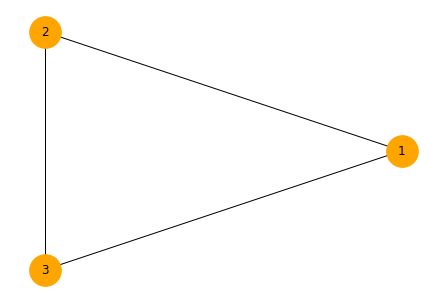

In [122]:
nx.draw_circular(G, node_color='orange', node_size=1000, with_labels=True)

### `Удаление данных из графа`

Можно удалить ребра:

In [123]:
G.remove_edge(1, 3)
G.edges

EdgeView([(1, 2), (2, 3)])

Можно удалить вершину (будут удалены все инцидентные ребра):

In [124]:
G.remove_node(2)
G.edges

EdgeView([])

Можно очистить весь граф:

In [125]:
G.clear()
print(G.number_of_edges(), G.number_of_nodes())

0 0


### `Генерация графов`

Известные стандартные графы можно создавать с помощью встроенных методов:

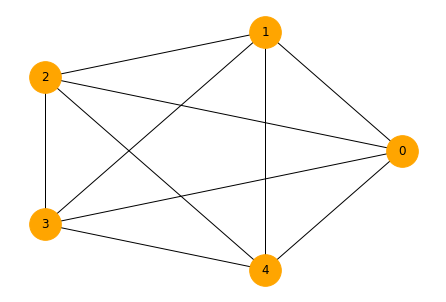

In [126]:
K_5 = nx.complete_graph(5)
nx.draw_circular(K_5, node_color='orange', node_size=1000, with_labels=True)

### `Генерация графов`

Генерировать также можно случайные графы:

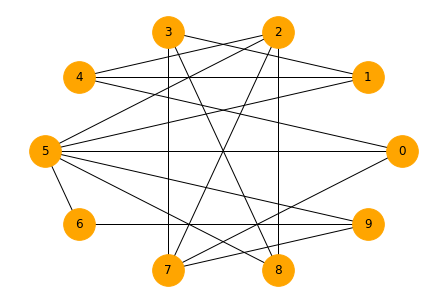

In [127]:
er = nx.erdos_renyi_graph(n=10, p=0.4)
nx.draw_circular(er, node_color='orange', node_size=1000, with_labels=True)

### `Создание графа из словаря или списка`

{('A', 'B'): Text(-0.14333660609105836, 0.4999999999999999, '1.5'),
 ('A', 'C'): Text(-0.04605598989461876, -0.4263681303277567, '2.0'),
 ('B', 'C'): Text(0.1893925959856784, -0.07363186967224339, '0.5')}

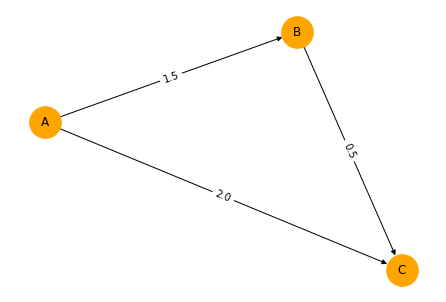

In [128]:
g = {'A': {'B': {'weight': 1.5}, 'C': {'weight': 2.0}},
     'B': {'C': {'weight': 0.5}}}

G = nx.DiGraph(g)

pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos, node_color='orange', node_size=1000, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

### `Конвертация графа в словарь или список`

Конвертация в словарь словарей сохраняет всю информацию:

In [129]:
nx.convert.to_dict_of_dicts(G)

{'A': {'B': {'weight': 1.5}, 'C': {'weight': 2.0}},
 'B': {'C': {'weight': 0.5}},
 'C': {}}

Конвертация в список - только информацию о структуре графа:

In [130]:
nx.convert.to_dict_of_lists(G)

{'A': ['B', 'C'], 'B': ['C'], 'C': []}

### `Операции над графами`

```python
nx.subgraph(G, nodes)         # induced subgraph view of G on nodes in nodes
nx.union(G1, G2)              # graph union
nx.disjoint_union(G1, G2)     # graph union assuming all nodes are different
nx.cartesian_product(G1, G2)  # return Cartesian product graph
nx.compose(G1, G2)            # combine graphs identifying nodes common to both
nx.complement(G)              # graph complement
nx.create_empty_copy(G)       # return an empty copy of the same graph class
nx.to_undirected(G)           # return an undirected representation of G
nx.to_directed(G)             # return a directed representation of G
```

### `Операции над графами`

Выделение подграфа:

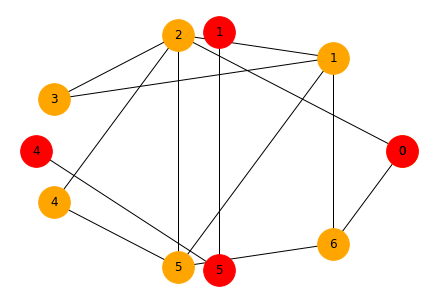

In [131]:
G = nx.erdos_renyi_graph(n=7, p=0.4)
nx.draw_circular(G, node_color='orange', node_size=1000, with_labels=True)
nx.draw_circular(nx.subgraph(G, [0, 1, 4, 5]), node_color='red', node_size=1000, with_labels=True)

### `Алгоритмы на графах`

В NetworkX реализовано много полезных алгоритмов для анализа и кластеризации графов, полный список есть в документации (https://networkx.org/documentation/stable/reference/algorithms/index.html)

Найдем кратчайший путь между парой вершин: 

[6, 1, 0, 3]


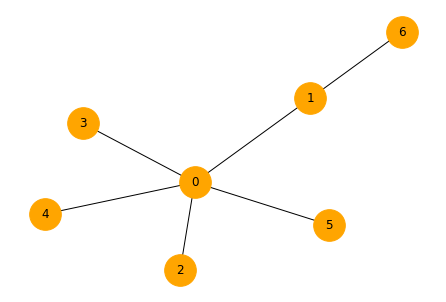

In [132]:
G = nx.full_rary_tree(5, 7)
nx.draw(G, node_color='orange', node_size=1000, with_labels=True)
print(nx.shortest_path(G, source=6, target=3))

### `Алгоритмы на графах`

Найдем все клики (полные подграфы) в алгоритме: 

[[0, 1, 2, 3, 4, 5]]

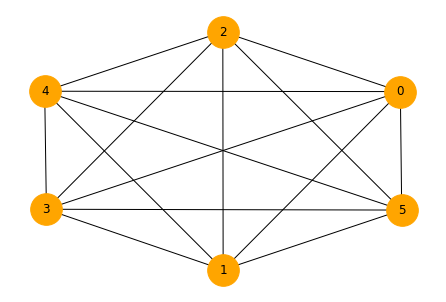

In [133]:
G = nx.complete_graph(6)
nx.draw(G, node_color='orange', node_size=1000, with_labels=True)
[e for e in nx.algorithms.clique.find_cliques(G)]

### `Алгоритмы на графах`

Выделение сообществ методом жадной максимизации модулярности: 

[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}), frozenset({12, 13, 14, 15, 16, 17, 18, 19, 20, 21})]


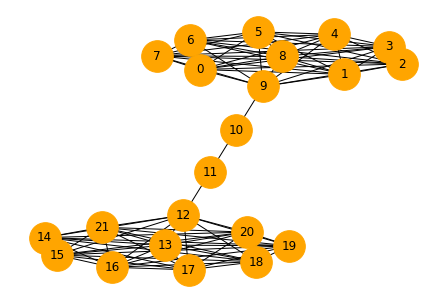

In [134]:
G = nx.barbell_graph(10, 2)

nx.draw_kamada_kawai(G, node_color='orange', node_size=1000, with_labels=True)
print(list(nx.algorithms.community.greedy_modularity_communities(G)))

По факту кластеризация и выделение сообществ — одна и та же задача, но в алгоритмах (и в реализациях) их часто описывают отдельно

### `Введение в библиотеку SciPy`

- SciPy — это библиотека для научных вычислений, решения оптимизационных, численных и статистических задач<br><br>
- Построена поверх NumPy<br><br>
- Эффективно реализует многие методы линейной алгебры и оптимизации<br><br>

Полезные ссылки:
- https://scipy-lectures.org/intro/scipy.html
- https://docs.scipy.org/doc/scipy/reference/

### `Состав SciPy`

__Что кратко рассмотрим:__

- `linalg` — линейная алгебра
- `optimize` — методы оптимизации и решения уравнений
- `sparse` — разреженные матрицы
- `stats` — вероятностные распределения и статистика

### `Состав SciPy`

__Что есть ещё:__

- `cluster` — алгоритмы кластеризации
- `constants` — физические и математические константы
- `fftpack` — инструменты для быстрого преобразования Фурье
- `integrate` — интегрирование и решение ОДУ
- `interpolate` — интерполяция и сплайны
- `io` — библиотека для работы с разными форматами входных и выходных данных
- `ndimage` — обработка N-мерных изображений
- `odr` — реализация Orthogonal distance regression
- `signal` — обработка сигналов
- `spatial` — пространственные структуры данных и алгоритмы
- `special` — набор специальных полезных функций
- `misc` — набор технических инструментов

### `Модуль scipy.linalg`

In [135]:
import numpy as np
from scipy import linalg

A = np.array([[1,2], [3, 4]])

In [136]:
linalg.det(A)  # determinant

-2.0

In [137]:
linalg.inv(A)  # inverted matrix

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [138]:
linalg.norm(A)  # matrix and vector norms

5.477225575051661

### `Модуль scipy.linalg`

In [139]:
for e in linalg.eig(A):  # eigen values and vectors
    print(e)

[-0.37228132+0.j  5.37228132+0.j]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [140]:
U, diags, V_T = linalg.svd(A)  # SVD
U @ np.diag(diags) @ V_T

array([[1., 2.],
       [3., 4.]])

In [141]:
P, L, U = linalg.lu(A)  # pivoted LU decomposition
P @ L @ U

array([[1., 2.],
       [3., 4.]])

### `Модуль scipy.optimize`

Сгенерируем точки с помощью синусоиды с шумом и попробуем восстановить параметры функции

In [142]:
from scipy import optimize

In [143]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

In [144]:
def func_to_fit(x, a, b):
    return a * np.sin(b * x)

In [145]:
params, params_covariance = optimize.curve_fit(func_to_fit, x_data, y_data)
print(params)

[3.17792443 1.5309279 ]


### `Модуль scipy.optimize`

Найдём минимум скалярной функции на отрезке (зависит от стартового приближения)

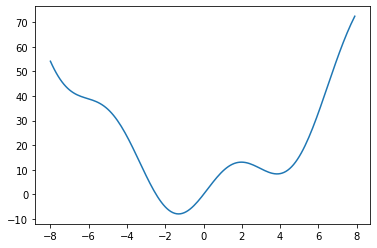

In [146]:
def f(x):
    return x**2 + 10 * np.sin(x)

x = np.arange(-8, 8, 0.1)
plt.plot(x, f(x)) 
plt.show() 

In [147]:
result = optimize.minimize(f, x0=4, bounds=((-8, 8),))  # 'bounds' is optional
result.x

array([3.83746782])

### `Модуль scipy.optimize`

Найдём минимум скалярной функции на отрезке (зависит от стартового приближения)

In [148]:
result = optimize.minimize(f, x0=0, bounds=((-8, 8),))  # 'bounds' is optional
result.x

array([-1.30643988])

In [149]:
result = optimize.basinhopping(f, x0=4, niter=1000)
result.x

array([-1.30644001])

Функция `optimize.minimize` имеет параметр `method`, в котором можно определять конкрентный метод оптимизации, подходящий для решаемой задачи

### `Модуль scipy.optimize`

Найдём нули скалярной функции

In [150]:
root = optimize.root(f, x0=1)
root.x

array([0.])

In [151]:
root2 = optimize.root(f, x0=-2)
root2.x

array([-2.47948183])

Находим только один корень, ближайший к стартовой точке, нужно идти по сетке для поиска нескольких

### `Модуль scipy.sparse`

- Включает в себя набор различных типов разреженных матриц и инструментов для работы с ними
- Мы рассмотрим основные форматы разреженных матриц, которые могут быть полезны в приложениях<br><br>


- __Coordinate Format (COO)__
    - представляет собой 3 массива `row`, `col`, `data`
    - `row` содержит номера строк ненулевых элементов
    - `col` содержит номера столбцов ненулевых элементов
    - `data` содержит сами ненулевые элементы

In [152]:
from scipy.sparse import coo_matrix

S = np.array([[1, 0, 0], [4, 0, 6], [0, 8, 0]])

cm = coo_matrix(S)
cm.row, cm.col, cm.data

(array([0, 1, 1, 2], dtype=int32),
 array([0, 0, 2, 1], dtype=int32),
 array([1, 4, 6, 8]))

### `Модуль scipy.sparse`

- __Compressed Sparse Row Format (CSR)__
    - Представляет собой три массива: `indices`, `indptr`, `data`
    - `indices` содержит индексы столбцов ненулевых элементов
    - `data` содержит значения ненулевых элементов
    - `indptr` содержит старты строк в `indices` и `data` по следующим правилам:<br><br>
        - длина `indptr` равна числу строк + 1, последний элемент равен числу ненулевых элементов
        - ненулевые значения $i$-й строки лежат в `data[indptr[i]: indptr[i + 1]]`
        - их индексы столбцов - в `indices[indptr[i]: indptr[i + 1]]`
        - элемент $(i, j)$ доступ в `data[indptr[i]+k]`, где `k` - это позиция `j` в `indices[indptr[i]: indptr[i + 1]]`

In [153]:
from scipy.sparse import csr_matrix

S = np.array([[1, 0, 0], [4, 0, 6], [0, 8, 0]])

csrm = csr_matrix(S)
csrm.indices, csrm.indptr, csrm.data

(array([0, 0, 2, 1], dtype=int32),
 array([0, 1, 3, 4], dtype=int32),
 array([1, 4, 6, 8]))

### `Модуль scipy.sparse`

- __Compressed Sparse Column Format (CSC)__
    - Представляет собой три массива: `indices`, `indptr`, `data`
    - `indices` содержит индексы строк ненулевых элементов
    - `data` содержит значения ненулевых элементов
    - `indptr` содержит старты столбцов в `indices` и `data` по следующим правилам:<br><br>
        - длина `indptr` равна числу столбцов + 1, последний элемент равен числу ненулевых элементов
        - ненулевые значения $i$-го столбца лежат в `data[indptr[i]: indptr[i + 1]]`
        - их индексы строк - в `indices[indptr[i]: indptr[i + 1]]`
        - элемент $(i, j)$ доступ в `data[indptr[j]+k]`, где `k` - это позиция `i` в `indices[indptr[j]: indptr[j + 1]]`

In [154]:
from scipy.sparse import csc_matrix

S = np.array([[1, 0, 0], [4, 0, 6], [0, 8, 0]])

cscm = csc_matrix(S)
cscm.indices, cscm.indptr, cscm.data

(array([0, 1, 2, 1], dtype=int32),
 array([0, 2, 3, 4], dtype=int32),
 array([1, 4, 8, 6]))

### `Модуль scipy.stats`

По выборке восстанавливаем параметры известного распределения

In [155]:
from scipy import stats

samples = np.random.normal(size=1000, loc=9.8, scale=3.5)
loc, scale = stats.norm.fit(samples)

print(loc, scale)

9.822289446497374 3.6260854736466017


In [156]:
samples = np.random.beta(a=1, b=4.6, size=5000) + 10

a, b, loc, scale = stats.beta.fit(samples)
print(a, b, loc, scale)

0.9779287061417725 4.408064763540894 10.000043532392134 0.9909762087504463


### `Модуль scipy.stats`

Посчитаем статистики выборки:

In [157]:
samples = np.random.normal(size=1000, loc=0.0, scale=1.0)

np.mean(samples) 

0.02673005228802625

In [158]:
np.median(samples)

0.01915247869851481

In [159]:
stats.scoreatpercentile(samples, 50)  # median

0.01915247869851481

In [160]:
stats.scoreatpercentile(samples, 90)

1.2586403371677946

### `Проверка статистических гипотез`

- Общая идея:
    - Дана наблюдаемая выборка данных
    - Формулируется _гипотеза_ $H_0$ - определённое предположение о распределении вероятностей, лежащем в основе наблюдаемой выборки
    - Формулируется альтернативная гипотеза $H_1$
    - Выбирается _статистический критерий_ (обычно это какая-то статистика выборки)
    - На основании выборки вычисляется значение статистического критерия $T$
    - На основании этого значения вычисляется _достигаемый уровень значимости_ $p(T)$ (p-value) - вероятность получить значение критерия такое же или ещё более экстремальное, чем T, при условии справедливости $H_0$
    - Если $p(T)$ достаточно мало (например, меньше уровня значимости $\alpha$), то $H_0$ отвергается


- Проверка гипотез доступна в `scipy.stats` и основанном на нем модуле `statsmodel`

### `Пример: T-критерий`

- T-критерий (тест Стьдента) используется для проверки гипотез о
    - равенстве матожиданий двух выборок
    - равенстве матожидания одной выборки заданному значению<br><br>
- В случае двух выборок, которые должны быть из распределения, близкого к нормальному, считается величина
$$
    t = \cfrac{m_1 - m_2}{\sqrt{\cfrac{d_1}{n_1} - \cfrac{d_2}{n_2}}},
$$
где
    - $m_i$ - выборочные средние
    - $d_i$ - выборочные дисперсии
    - $n_i$ - размеры выборок

### `Пример: T-критерий`

- Определим функцию для генерации и визуализации выборок из нормального распределения:

In [161]:
def gen_normal_samples(mean_1, mean_2):
    samples1 = np.random.normal(mean_1, size=1000)
    samples2 = np.random.normal(mean_2, size=1000)

    bins = np.linspace(-4, 4, 30)
    histogram1, bins = np.histogram(samples1, bins=bins, density=True)
    histogram2, bins = np.histogram(samples2, bins=bins, density=True)

    plt.figure(figsize=(6, 4))
    plt.hist(samples1, bins=bins, density=True, label="Samples 1")
    plt.hist(samples2, bins=bins, density=True, label="Samples 2")
    plt.legend(loc='best')
    plt.show()
    
    return samples1, samples2

- Воспользуемся тестов `scipy.stats.ttest_ind` для проверки гипотезы о равенстве средних выборок:

In [162]:
#?stats.ttest_ind

#Calculate the T-test for the means of *two independent* samples of scores.

#This is a two-sided test for the null hypothesis that 2 independent samples
#have identical average (expected) values. This test assumes that the
#populations have identical variances by default.

### `Пример: T-критерий`

- Посчитаем статистический T-тест для случая выборок из нормального распределения с априорно далекими средними:

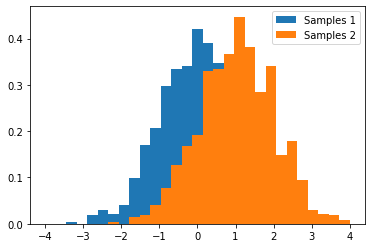

In [163]:
samples_1, samples_2 = gen_normal_samples(mean_1=0, mean_2=1)

In [164]:
t_score, p_value = stats.ttest_ind(samples_1, samples_2)
t_score, p_value

(-22.88607477074996, 3.826036495114734e-103)

- Большое по модулю значений `t_score` означает большую разность между двумя порождающими случайными процессами
- Значение `p_value` характеризует вероятность того, что обе выборки были порождены процессами с одинаковым матожиданием

### `Пример: T-критерий`

- Посчитаем статистический T-тест для случая выборок из нормального распределения с априорно близкими средними:

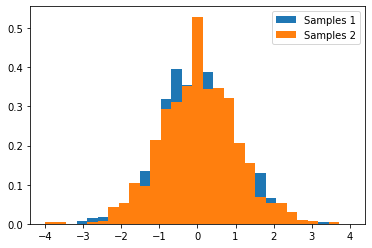

In [165]:
samples_1, samples_2 = gen_normal_samples(mean_1=-0.005, mean_2=0.005)

In [166]:
t_score, p_value = stats.ttest_ind(samples_1, samples_2)
t_score, p_value

(-0.3784854417347607, 0.7051102170535177)

## `Спасибо за внимание!`